<a target="_blank" href="https://colab.research.google.com/github/C22-PS186-Bangkit-2022-Capstone-Team/Relic-Classifier/blob/main/Experimental.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# !unzip -d /dataset/ dataset.zip

In [4]:
# !unzip dataset.zip -d /content/drive/MyDrive/Experimental/dataset

In [5]:
cd drive/MyDrive/Experimental

/content/drive/MyDrive/Experimental


## Remove Dodgy Images

In [6]:
import cv2
import imghdr

In [7]:
os.listdir('dataset')

['500_lohan_temple',
 'gedung_gonggong',
 'monpera',
 'monumen_merpati_perdamaian',
 'tugu_keris_siginjai',
 'tugu_nol_km_indonesia']

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
data_dir = 'dataset'

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [11]:
os.listdir(os.path.join(data_dir, '500_lohan_temple'))

['500lohantemple1.jpeg',
 '500lohantemple0.jpeg',
 '500lohantemple2.jpeg',
 '500lohantemple3.jpeg',
 '500lohantemple6.jpeg',
 '500lohantemple5.jpeg',
 '500lohantemple4.jpeg',
 '500lohantemple7.jpeg',
 '500lohantemple9.jpeg',
 '500lohantemple10.jpeg',
 '500lohantemple11.jpeg',
 '500lohantemple12.jpeg',
 '500lohantemple13.png',
 '500lohantemple14.jpeg',
 '500lohantemple18.jpeg',
 '500lohantemple19.jpeg',
 '500lohantemple16.jpeg',
 '500lohantemple15.jpeg',
 '500lohantemple17.jpeg',
 '500lohantemple21.jpeg',
 '500lohantemple22.jpeg',
 '500lohantemple23.jpeg',
 '500lohantemple25.jpeg',
 '500lohantemple26.jpeg',
 '500lohantemple24.jpeg',
 '500lohantemple27.jpeg',
 '500lohantemple28.jpeg',
 '500lohantemple29.jpeg',
 '500lohantemple30.jpeg',
 '500lohantemple31.jpeg',
 '500lohantemple32.jpeg',
 '500lohantemple35.jpeg',
 '500lohantemple33.jpeg',
 '500lohantemple34.jpeg',
 '500lohantemple36.jpeg',
 '500lohantemple37.jpeg',
 '500lohantemple39.jpeg',
 '500lohantemple42.jpeg',
 '500lohantemple43.jpe

## Load data

In [12]:
tf.data.Dataset??

In [13]:
import numpy as np

In [14]:
data = tf.keras.utils.image_dataset_from_directory('dataset')

Found 825 files belonging to 6 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

In [17]:
batch[0].shape

(32, 256, 256, 3)

In [18]:
batch[0]

array([[[[188.      , 215.      , 236.      ],
         [188.      , 215.      , 236.      ],
         [187.1875  , 214.1875  , 235.1875  ],
         ...,
         [177.1875  , 207.1875  , 241.1875  ],
         [177.90625 , 207.90625 , 245.65625 ],
         [177.90625 , 206.90625 , 246.90625 ]],

        [[188.      , 215.      , 236.      ],
         [188.      , 215.      , 236.      ],
         [187.71875 , 214.71875 , 235.71875 ],
         ...,
         [178.71875 , 209.4375  , 241.28125 ],
         [178.71875 , 208.71875 , 245.03125 ],
         [178.71875 , 208.71875 , 245.28125 ]],

        [[188.      , 215.      , 236.      ],
         [188.      , 215.      , 236.      ],
         [187.40234 , 214.40234 , 235.40234 ],
         ...,
         [179.46875 , 210.46875 , 241.46875 ],
         [179.53125 , 210.1211  , 242.35156 ],
         [179.53125 , 209.73047 , 243.13281 ]],

        ...,

        [[171.45703 , 172.45703 , 154.45703 ],
         [168.27734 , 169.27734 , 151.27734 ]

In [19]:
batch[1]

array([2, 4, 3, 2, 5, 2, 5, 2, 1, 2, 5, 0, 2, 0, 4, 1, 4, 2, 3, 1, 5, 4,
       3, 2, 3, 3, 2, 2, 0, 4, 5, 2], dtype=int32)

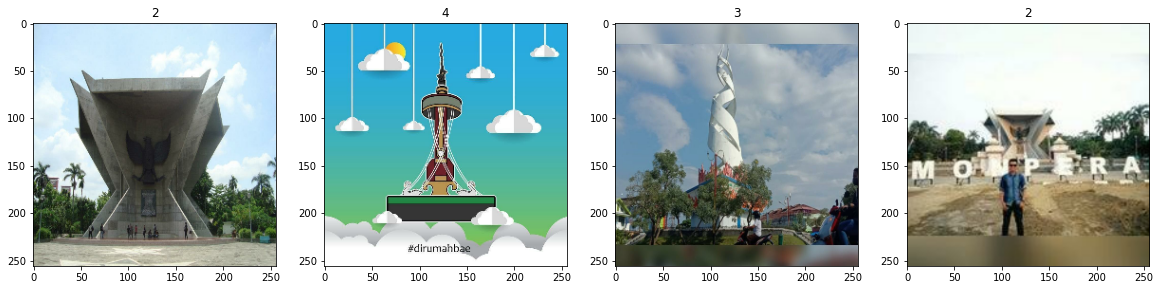

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocessing

In [21]:
# Scale data
data = data.map(lambda x, y: (x/255, y))

In [22]:
scaled_iterator = data.as_numpy_iterator()

In [23]:
batch = scaled_iterator.next()

In [24]:
batch

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [25]:
batch[0].max()

1.0

In [26]:
batch[0].min()

0.0

## Partitioning Data

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1)

In [28]:
len(data)

26

In [29]:
test_size + train_size + val_size

26

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Model Creation

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu', input_shape = (256, 256, 3))) 
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (256, 256, 3))) 
model.add(MaxPooling2D(pool_size = (2, 2), strides = None, padding = 'valid', data_format = None)) 
model.add(Dropout(0.25)) 
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (256, 256, 3))) 
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu', input_shape = (256, 256, 3))) 
model.add(MaxPooling2D(pool_size = (2, 2), strides = None, padding = 'valid', data_format = None))
model.add(Dropout(0.25)) 
model.add(Flatten()) 
model.add(Dense(256))
model.add(Dense(6, activation="softmax"))

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      18496     
                                                        

In [35]:
logdir = 'logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [38]:
test

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [39]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
18/18 [==============================] - 15s 550ms/step - loss: 15.6640 - accuracy: 0.1615 - val_loss: 1.7894 - val_accuracy: 0.2240
Epoch 2/20
18/18 [==============================] - 11s 554ms/step - loss: 1.7859 - accuracy: 0.1927 - val_loss: 1.7888 - val_accuracy: 0.2135
Epoch 3/20
18/18 [==============================] - 12s 599ms/step - loss: 1.7757 - accuracy: 0.1875 - val_loss: 1.7848 - val_accuracy: 0.2292
Epoch 4/20
18/18 [==============================] - 11s 551ms/step - loss: 1.7622 - accuracy: 0.1892 - val_loss: 1.7750 - val_accuracy: 0.2448
Epoch 5/20
18/18 [==============================] - 16s 856ms/step - loss: 1.7301 - accuracy: 0.2882 - val_loss: 1.7049 - val_accuracy: 0.3854
Epoch 6/20
18/18 [==============================] - 17s 923ms/step - loss: 1.6021 - accuracy: 0.4132 - val_loss: 1.5271 - val_accuracy: 0.4583
Epoch 7/20
18/18 [==============================] - 11s 533ms/step - loss: 1.4269 - accuracy: 0.4809 - val_loss: 1.4169 - val_accuracy: 0.500

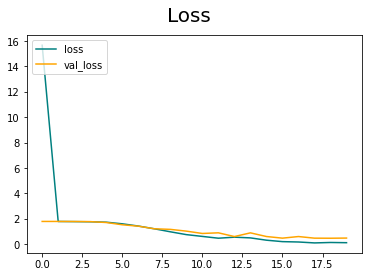

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

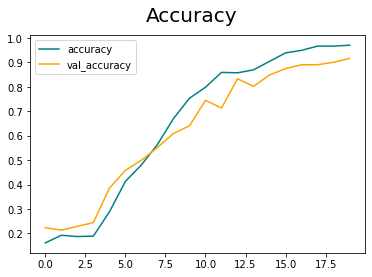

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Model Evaluation

In [88]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [89]:
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

In [93]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = np.max(model.predict(X), axis=-1)
  ypred = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, ypred)

In [94]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.84745765, shape=(), dtype=float32) tf.Tensor(0.9708738, shape=(), dtype=float32) tf.Tensor(0.94736844, shape=(), dtype=float32)


## Test

In [96]:
from google.colab import files
import cv2

In [102]:
cd /content

/content


In [ ]:
cd drive/MyDrive/Experimental

In [120]:
label = os.listdir('drive/MyDrive/Experimental/dataset')

In [125]:
label

['500_lohan_temple',
 'gedung_gonggong',
 'monpera',
 'monumen_merpati_perdamaian',
 'tugu_keris_siginjai',
 'tugu_nol_km_indonesia']

Saving DSC5348-e1504486745389-2708756728.jpg to DSC5348-e1504486745389-2708756728.jpg
Saving hqdefault-3017659350.jpg to hqdefault-3017659350.jpg
Saving maxresdefault.jpg to maxresdefault.jpg
Saving maxresdefault-1754268356.jpg to maxresdefault-1754268356.jpg
Saving Pantai-Ramah-Anak-2222446477.jpg to Pantai-Ramah-Anak-2222446477.jpg
Saving tugu-keris-3305357809.jpg to tugu-keris-3305357809.jpg


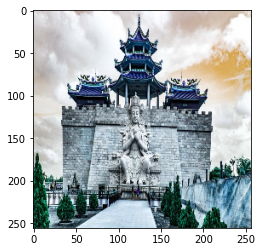

[[9.9999940e-01 5.4065811e-07 3.3976984e-11 6.9727486e-09 3.3868980e-12
  4.5677752e-13]]
500_lohan_temple


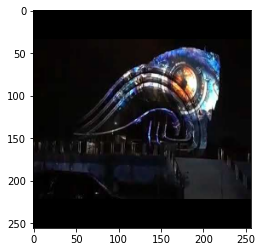

[[1.1665864e-10 9.9999988e-01 1.2092170e-07 4.9441953e-09 4.5282846e-08
  8.9881425e-10]]
gedung_gonggong


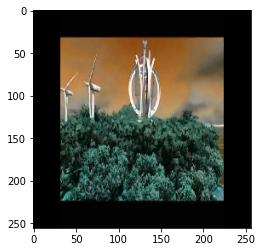

[[6.49302528e-05 7.35789165e-02 1.25303236e-03 8.43841732e-02
  1.41160805e-02 8.26602876e-01]]
tugu_nol_km_indonesia


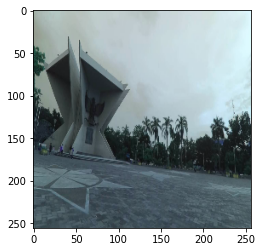

[[0.01262009 0.01775973 0.8563632  0.09576692 0.00141835 0.01607177]]
monpera


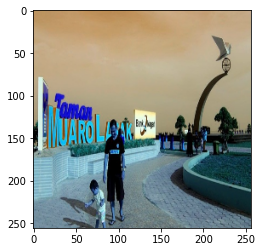

[[1.3978418e-04 7.3114703e-03 9.4231600e-01 3.6002859e-02 1.3268421e-02
  9.6145691e-04]]
monpera


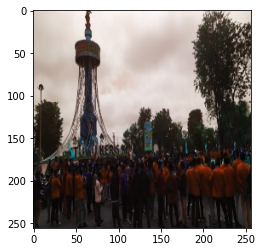

[[6.1397500e-06 3.1937253e-02 1.7848012e-01 4.4065160e-03 7.6658052e-01
  1.8589459e-02]]
tugu_keris_siginjai


In [126]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = cv2.imread(path)
  # plt.imshow(img)
  # plt.show()

  resize = tf.image.resize(img, (256,256))
  plt.imshow(resize.numpy().astype(int))
  plt.show()

  yhat = model.predict(np.expand_dims(resize/255, 0))
  pred_class = np.argmax(yhat, axis=-1)
  print(yhat)
  prediction_class = int(pred_class)
  print(label[prediction_class])


In [111]:
np.max([1.0541526e-02, 2.9423940e-03, 6.1844975e-01, 2.3387987e-05, 4.4379634e-05, 3.6799857e-01])

0.61844975